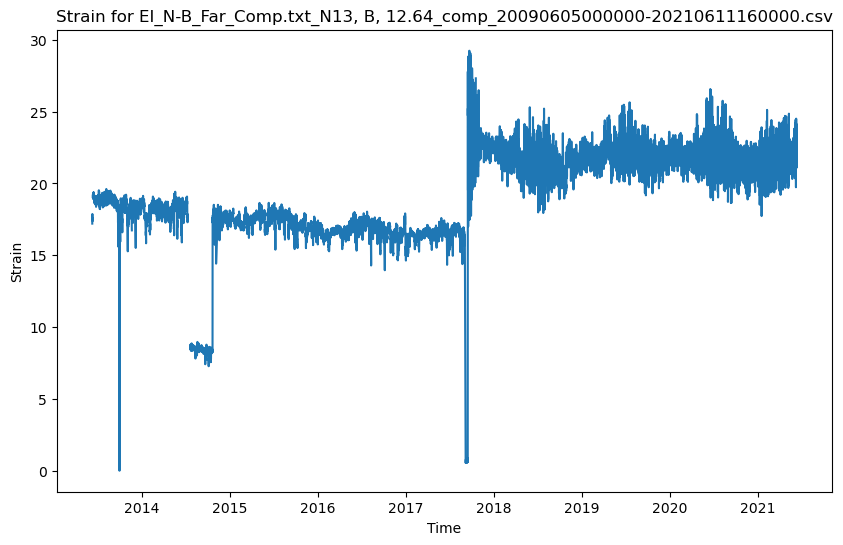

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

folder = 'timeseries_csv/'
file = 'EI_N-B_Far_Comp.txt_N13, B, 12.64_comp_20090605000000-20210611160000.csv'
# file = 'EI_N-B_Far_Comp.txt_N13, B, 12.64_comp_20090605000000-20210611160000.csv'

df = pd.read_csv(folder + file, parse_dates=['Time'])

#Choose start and end time (start '2009-06-05 00:00:00', end '2021-06-11 16:00:00')
# start_time = '2013-06-03 08:00:00'
# end_time = '2021-06-11 16:00:00'

# df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]


plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

In [113]:
#Find values of strain that are exactly zero
df_zero = df[df["Strain"] == 0]
print(df_zero)

          Time_index                Time  Strain
8579  20131001080000 2013-10-01 08:00:00     0.0


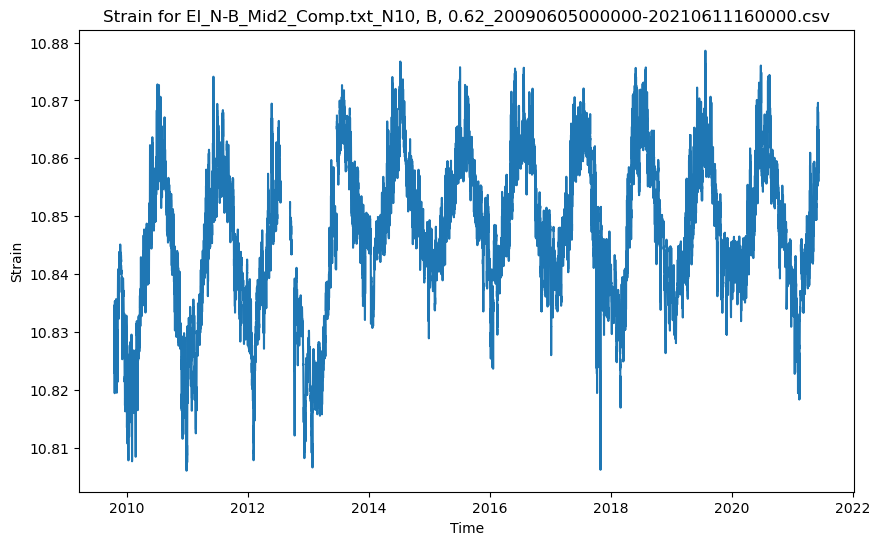

In [114]:
#Remove rows with strain values of zero and plot
indices_to_remove = df_zero.index
df = df.drop(index=indices_to_remove)
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

Lower bnound = 10.820540000000001 
Upper bound = 10.875079999999999
Number of outliers removed: 1835


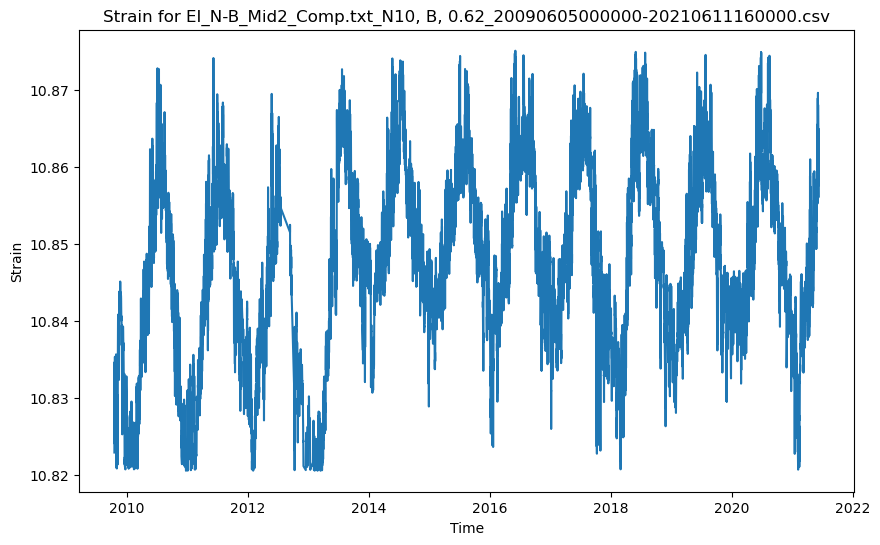

,Time_index,Time,Strain
4,20091016080000,2009-10-16 08:00:00,10.82292
5,20091016120000,2009-10-16 12:00:00,10.82918
6,20091016160000,2009-10-16 16:00:00,10.83069
7,20091016200000,2009-10-16 20:00:00,10.83050
8,20091017000000,2009-10-17 00:00:00,10.82926
...,...,...,...
25306,20210610200000,2021-06-10 20:00:00,10.86405
25307,20210611000000,2021-06-11 00:00:00,10.86338
25308,20210611040000,2021-06-11 04:00:00,10.86118
25309,20210611080000,2021-06-11 08:00:00,10.86063


In [115]:
# Compute IQR
Q1 = df['Strain'].quantile(0.25)  # 25th percentile
Q3 = df['Strain'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for extreme outliers (3 * IQR rule)
multiplier = 1
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR
print(f'Lower bnound = {lower_bound} \nUpper bound = {upper_bound}')

# Remove extreme outliers
df_cleaned = df[(df['Strain'] >= lower_bound) & (df['Strain'] <= upper_bound)]
print(f'Number of outliers removed: {df.shape[0]-df_cleaned.shape[0]}')
df = df_cleaned

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()
df

In [116]:
df.describe()

,Time_index,Time,Strain
count,2.347600e+04,23476,23476.000000
mean,2.015372e+13,2015-10-21 12:24:52.997103360,10.847898
min,2.009102e+13,2009-10-16 08:00:00,10.820560
25%,2.012122e+13,2012-12-15 19:00:00,10.839790
50%,2.015121e+13,2015-12-07 02:00:00,10.847960
75%,2.018092e+13,2018-09-15 21:00:00,10.857193
max,2.021061e+13,2021-06-11 12:00:00,10.875060
std,3.376439e+10,NaN,0.011568


In [117]:
#Count the number of NaN values in each column
df.isna().sum()

Time_index    0
Time          0
Strain        0
dtype: int64

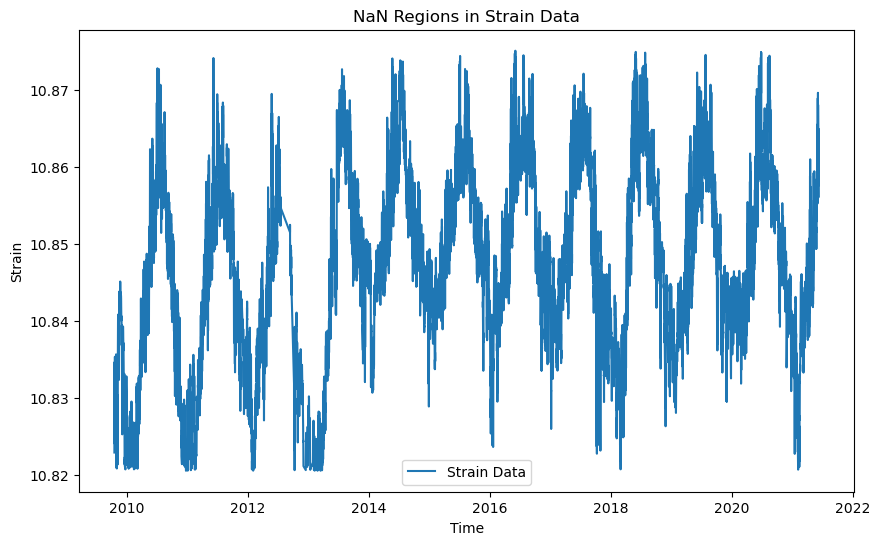

In [118]:
import numpy as np

# Identify NaN regions
df['is_nan'] = df['Strain'].isna()  # Create a boolean column for NaNs

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-', label="Strain Data")

# Shade regions with NaNs
start_time = None
for i in range(len(df)):
    if df['is_nan'].iloc[i] and start_time is None:  # Start of NaN region
        start_time = df['Time'].iloc[i]
    elif not df['is_nan'].iloc[i] and start_time is not None:  # End of NaN region
        end_time = df['Time'].iloc[i]
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)  # Shade NaN region
        start_time = None

# Handle if NaNs end at the last row
if start_time is not None:
    plt.axvspan(start_time, df['Time'].iloc[-1], color='red', alpha=0.3)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title('NaN Regions in Strain Data')
plt.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Box Plot of Strain')

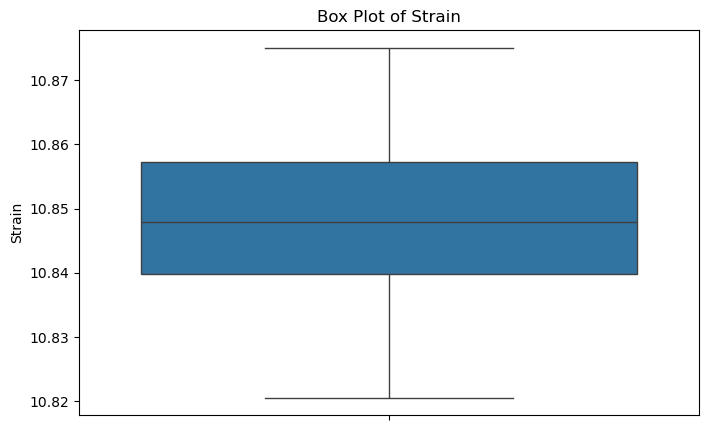

In [119]:
#Boxplot of strain values
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Strain'])

plt.ylabel('Strain')
plt.title(f'Box Plot of Strain')

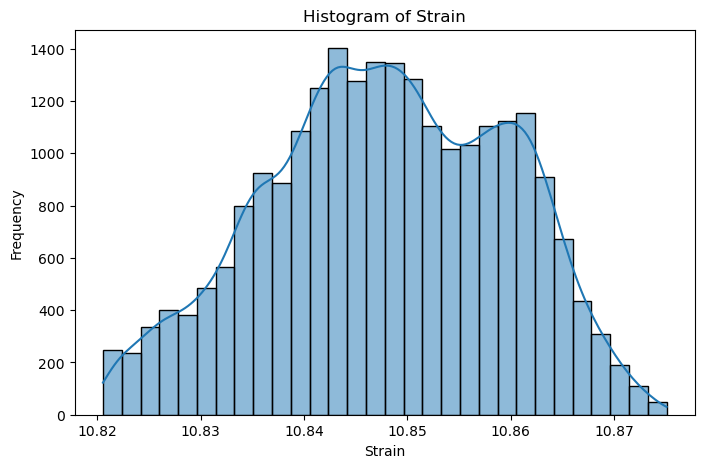

In [120]:
# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Strain'], bins=30, kde=True)  # kde=True adds a density curve

# Labels and title
plt.xlabel('Strain')
plt.ylabel('Frequency')
plt.title('Histogram of Strain')

# Show plot
plt.show()